## 8_Sprint_8
### Hyphotesis Testing
#### Eloi Canals

#### Exercici 1. 
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona **un atribut** del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

### Dades.
Accedim a un dataframe de dades estadistiques de combats d'arts marcials mixtes (1993 - 2001), on tenim informació dels lluitadors, categoria, guanyador, tipus de victoria, etc.
Sobre aquestes dades plantejarem unes Hipotesis H1 que validarem o no amb un sampling sobre les dades i tests de Hipotesis testing.

Source:
https://www.kaggle.com/rajeevw/ufcdata

### 1. Definir Hipotesis Nul·la. Status Quo. H0

- Els lluitadors els cuals tenen un abast de braç mes llarg, tenen més probabilitat de guanyar tant per KO com per submissió (tenir llargues les extremitats serveis tant per cops al oponent i no ser colpejat, com per submissions).

"There is no getting around the fact that there are tangible benefits to height and reach advantages in MMA."

Source: https://evolve-mma.com/blog/does-a-height-and-reach-advantage-necessarily-make-you-a-better-mixed-martial-artist/


### 2. Definir Hipotesis H1

Ens centrarem només el el 'reach advantage' ja que en el pes, se suposa que els dos lluitadors lluiten en la mateixa categoria de pes, per que l'aventatge de pes no s'hauria de considerar.

* Formulem la hipotesis H1 declarant que el 'reach advantage' no es definitiu a l'hora de conseguir una victoria en MMA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ufc_df = pd.read_csv('archive/data.csv')

ufc_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [2]:
ufc_df.shape

(6012, 144)

#### El dataset te moltes columnes, es fa una primera tria de les que a priori
#### poden ser interessants per declarar la hipotesis.

In [3]:
with pd.option_context('display.max_columns', None):
    print (ufc_df)

          R_fighter           B_fighter        Referee        date  \
0      Adrian Yanez       Gustavo Lopez  Chris Tognoni  2021-03-20   
1      Trevin Giles       Roman Dolidze      Herb Dean  2021-03-20   
2       Tai Tuivasa     Harry Hunsucker      Herb Dean  2021-03-20   
3     Cheyanne Buys   Montserrat Conejo     Mark Smith  2021-03-20   
4     Marion Reneau       Macy Chiasson     Mark Smith  2021-03-20   
...             ...                 ...            ...         ...   
6007  Remco Pardoel  Alberta Cerra Leon  John McCarthy  1994-03-11   
6008   Orlando Wiet    Robert Lucarelli  John McCarthy  1994-03-11   
6009  Johnny Rhodes       David Levicki  John McCarthy  1994-03-11   
6010  Patrick Smith          Ray Wizard  John McCarthy  1994-03-11   
6011   Scott Morris      Sean Daugherty  John McCarthy  1994-03-11   

                    location Winner  title_bout       weight_class  B_avg_KD  \
0     Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   

In [4]:
# Reduïm les columnes del dataset
ufc_columns_mask = ['R_fighter','B_fighter','Winner','weight_class','B_total_time_fought(seconds)','B_total_rounds_fought','B_total_title_bouts','B_current_win_streak','B_current_lose_streak','B_longest_win_streak','B_wins','B_losses','B_draw','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_KO/TKO','B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage','B_Stance','B_Height_cms','B_Reach_cms','B_Weight_lbs','R_total_time_fought(seconds)','R_total_rounds_fought','R_total_title_bouts','R_current_win_streak','R_current_lose_streak','R_longest_win_streak','R_wins','R_losses','R_draw','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_KO/TKO','R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage','R_Stance','R_Height_cms','R_Reach_cms','R_Weight_lbs','B_age','R_age']
ufc_df_sel = ufc_df[ufc_columns_mask].copy(deep=True)
ufc_df_sel

,R_fighter,B_fighter,Winner,weight_class,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,531.5,4,0,0,1,1,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Red,Middleweight,577.5,4,0,2,0,2,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,NaN,0,0,0,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,NaN,0,0,0,0,0,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,764.0,11,1,3,0,3,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [5]:
# Filtrem els que tenen valors a les columnes reach

## reach_df = ufc_df_sel.dropna(subset = ["B_Reach_cms","R_Reach_cms"]) 

# DISABLED. Al fer el dropna s'ometen aproximadament el 20% de files.
# El resultat no seria cientificament acurat.
# Un cop discutit amb el mentor, es decideix reomplir els que no tinguin la informació
# de reach amb la mitja aritmetica dels lluitadors.

ufc_reach_mean = (ufc_df_sel.B_Reach_cms.mean() + ufc_df_sel.R_Reach_cms.mean()) / 2
ufc_reach_mean

183.39551664419776

In [6]:
# Creem les noves columnes

def isNaN(num):
    return num!= num
        
B_New_Reach = ufc_df_sel.B_Reach_cms.apply(lambda x: ufc_reach_mean if isNaN(x) == True else x)
B_New_Reach

R_New_Reach = ufc_df_sel.R_Reach_cms.apply(lambda x: ufc_reach_mean if isNaN(x) == True else x)
R_New_Reach

0       177.800000
1       187.960000
2       190.500000
3       160.020000
4       172.720000
           ...    
6007    183.395517
6008    183.395517
6009    183.395517
6010    183.395517
6011    183.395517
Name: R_Reach_cms, Length: 6012, dtype: float64

In [7]:
# Creem la columna reach_diff entre lluitadors
# OLD reach_diff = reach_df.B_Reach_cms - reach_df.R_Reach_cms
reach_diff = B_New_Reach - R_New_Reach
reach_diff

0       -7.62
1        5.08
2        0.00
3       -5.08
4       10.16
        ...  
6007     0.00
6008     0.00
6009     0.00
6010     0.00
6011     0.00
Length: 6012, dtype: float64

#### Tenim una mostra amb dades de 4964/6012

In [8]:
ufc_df_sel['Reach_Diff'] = reach_diff
ufc_df_sel

,R_fighter,B_fighter,Winner,weight_class,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Reach_Diff
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,531.5,4,0,0,1,1,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,-7.62
1,Trevin Giles,Roman Dolidze,Red,Middleweight,577.5,4,0,2,0,2,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,5.08
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,NaN,0,0,0,0,0,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,0.00
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,NaN,0,0,0,0,0,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,-5.08
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,764.0,11,1,3,0,3,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,10.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN,0.00
6008,Orlando Wiet,Robert Lucarelli,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN,0.00
6009,Johnny Rhodes,David Levicki,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN,0.00
6010,Patrick Smith,Ray Wizard,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0,0.00


In [9]:
# Afegim la columna
reach_diff.columns = ['Reach_Diff']
reach_diff

0       -7.62
1        5.08
2        0.00
3       -5.08
4       10.16
        ...  
6007     0.00
6008     0.00
6009     0.00
6010     0.00
6011     0.00
Length: 6012, dtype: float64

#### Descartem els que la diferencia sigui 0 perque si no hi ha diferencia en el 'reach advantage' no es determinant per la victoria final.

In [10]:
reach_df = ufc_df_sel[ufc_df_sel.Reach_Diff != 0.00]
##reach_df

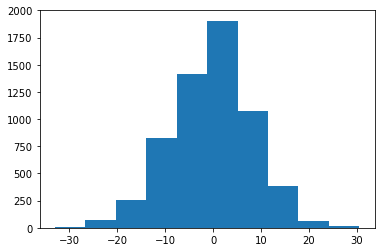

In [11]:
# histogram plot
from matplotlib import pyplot
# seed the random number generator

# generate univariate observations
data = ufc_df_sel.Reach_Diff
# histogram plot
pyplot.hist(data)
pyplot.show()

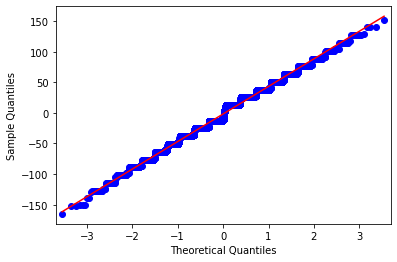

In [12]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator

# generate univariate observations
data = 5 * reach_df.Reach_Diff
# q-q plot
qqplot(data, line='s')
pyplot.show()

In [13]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = ufc_df_sel.Reach_Diff
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=27.399, p=0.000
Probably not Gaussian


In [14]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = ufc_df_sel.Reach_Diff
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=24.423
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


## Interpretació de les dades.

Origen del Dataset:
https://www.kaggle.com/rajeevw/ufcdata

Puntuació de Usability: Usability 9.7

S'asumeix que les dades son principalment correctes ja que han tingut força activitat en la pestanya de desenvolupament de codi.

En una primera exploració de les dades es pot començar a interpretar que potser les dades no s'ajustaran molt als canons gaussians. Pero també es cert que al ser un sector de població molt concret en quan a deportistes d'elit i en unes franges d'edat molt concretes, es possible que les dades estiguin focalitzades en un sector de població molt especific i en el sector del esport d'alt nivell.

En una exploració en profunditat:

* 8_Sprint_8T01v2_Wins.ipynb
* 8_Sprint_8T01v3_Weight.ipynb
* 8_Sprint_8T01v4_Age.ipynb
* 8_Sprint_8T01v5_Strikes.ipynb

S'han analitzat diversos atributs i s'han aplicat tots els tests de normalitat donant tots com NO GAUSSIANS. Si aixos es dones només en una columna podria ser interpretat com un desviament en aquell atribut, pero si son 5 columnes, es podria tractar de que el contingut del dataset té una orientació especial i que no es correspon amb una campana gaussiana estandard.

Tot i que els tests de normalitat Gausianna D'Agostino's K^2 Normality Test i Anderson-Darling Normality Test suggereixen que potser les dades no son gausianes, es decideix optar per interpretar-ho com un **'SOFT FAIL'*** ja que els Visual Normality Tests (Histogram i Quantile-Quantile Plot) si que apunten a que les dades son Gaussianes.

*
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Es continua endavant amb els metodes estadistics parametrics escollits.

## Hipotesis testing

In [16]:
# Agafem la nostra mostra de mostreig amb el mètode Simple Random Sampling (+-20%)
np.random.seed(1234)

ufc_df_sample = ufc_df_sel.sample(n=1200)

from scipy import stats

stat, p = stats.shapiro(ufc_df_sample.Reach_Diff)
print('Statistics=%.3f, p=%.10f' % (stat, p))

Statistics=0.990, p=0.0000002656


#### Resultat Test

El p-value es menor que alpha=0.05, per tant **rebutjem la hipòtesi nul·la H0**, és a dir, que la probabilitat apunta a que no es tracta d'una distribució normal.


#### Exercici 2. 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona **dos altres atributs** del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

### 1. Definir Hipotesis Nul·la. Status Quo. H0

Un altre factor fisic que si que pot determinar el resultat d'un combat MMA es la diferencia d'altura dels lluitadors. Tot i lluitar dins la mateixa categoria de pes, un lluitador pot ser mes alt que un altre i pot ser un factor determinant a l'hora de veure qui guanya el combat.

* Per tant definirem l'Status Quo o H0 com que: Si un lluitador es més alt que el seu oponent, té mes probabilitats de guanyar el combat.

Source:
https://forums.sherdog.com/threads/why-is-height-an-advantage.3279635/

### 2. Definir Hipotesis H1

* La Hipotesis H1 plantejada es que **la H0 no es valida** i que l'alçada no es determinant per una victoria abans de temps.

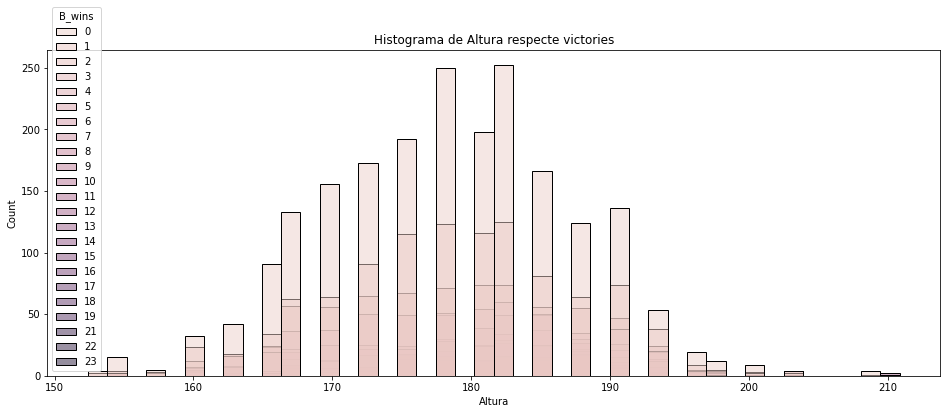

In [15]:
# Histograma de la distribució de la altura respecte victories
plt.figure(figsize=(16, 6))
sns.histplot(data=ufc_df, x='B_Height_cms', hue='B_wins')

plt.title('Histograma de Altura respecte victories');
plt.xlabel('Altura');

In [16]:
# Creem la columna height_diff entre lluitadors
#
height_diff = ufc_df.R_Height_cms - ufc_df.B_Height_cms
height_diff

0        5.08
1       -5.08
2        0.00
3        7.62
4      -12.70
        ...  
6007    17.78
6008   -10.16
6009   -12.70
6010      NaN
6011    -5.08
Length: 6012, dtype: float64

In [17]:
ufc_df_sel['Height_Diff'] = height_diff
ufc_df_sel

,R_fighter,B_fighter,Winner,weight_class,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Reach_Diff,Height_Diff
0,Adrian Yanez,Gustavo Lopez,Red,Bantamweight,531.5,4,0,0,1,1,...,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,-7.62,5.08
1,Trevin Giles,Roman Dolidze,Red,Middleweight,577.5,4,0,2,0,2,...,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,5.08,-5.08
2,Tai Tuivasa,Harry Hunsucker,Red,Heavyweight,NaN,0,0,0,0,0,...,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,0.00,0.00
3,Cheyanne Buys,Montserrat Conejo,Blue,WomenStrawweight,NaN,0,0,0,0,0,...,0,0,Switch,160.02,160.02,115.0,28.0,25.0,-5.08,7.62
4,Marion Reneau,Macy Chiasson,Blue,WomenBantamweight,764.0,11,1,3,0,3,...,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,10.16,-12.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN,0.00,17.78
6008,Orlando Wiet,Robert Lucarelli,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN,0.00,-10.16
6009,Johnny Rhodes,David Levicki,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN,0.00,-12.70
6010,Patrick Smith,Ray Wizard,Red,OpenWeight,NaN,0,0,0,0,0,...,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0,0.00,NaN


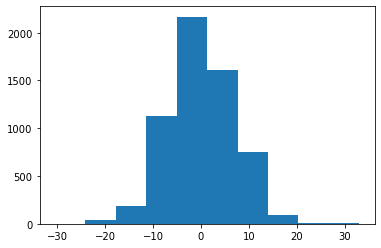

In [18]:
# histogram plot

# seed the random number generator

# generate univariate observations
data = ufc_df_sel.Height_Diff
# histogram plot
pyplot.hist(data)
pyplot.show()

#### Descartem els que la diferencia sigui 0 perque si no hi ha diferencia entre les altures dels lluitadors no es determinant per la victoria final.

In [19]:
height_df = ufc_df_sel[ufc_df_sel.Height_Diff != 0.00]

In [20]:
# Agafem la nostra mostra de mostreig amb el mètode Simple Random Sampling (+-20%)
np.random.seed(1234)

ufc_df_sample =height_df.sample(n=1200)

In [21]:
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
# Utilitzsem la prova 2-tailed Welchs' t-test (equivalent a Student's t-test però
# quan no podem assegurar que dues poblacions tinguin mateixa variança)

ALPHA = 0.05

stat, p = ttest_ind(ufc_df_sample.Height_Diff.dropna(),ufc_df_sample.R_wins.dropna(), alternative='two-sided', equal_var=False)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = -15.909
p-value = 0.000
We can reject H0


#### Resultat TEST

El p-value es menor que alpha=0.05, per tant **rebutjem la hipòtesi nul·la H0**, és a dir, rebutjem amb un 95% de confiança que la altura es determinant a l'hora de conseguir una victoria.

#### Exercici 3. 
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona **tres atributs** del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

### 1. Definir Hipotesis Nul·la. Status Quo. H0

Per ultim intentarem plantejar la hipotesi respecte els tres atributs de la posició del lluitador: Orthodox (dretà), Southpaw (esquerrà), Mixed (ambidestre)

* Hipotesis Nul·la: Si la posició del lluitador es Southpaw, llavors dona avantatge per conseguir la victoria.

Font:
https://towardsdatascience.com/data-science-meets-ufc-does-a-fighters-stance-really-give-them-an-advantage-fdc6141f6e29

### 2. Definir Hipotesis H1

La Hipotesis alternativa es podria declarar com:
* La posició del lluitador no es definitiva per aconseguir la victoria.

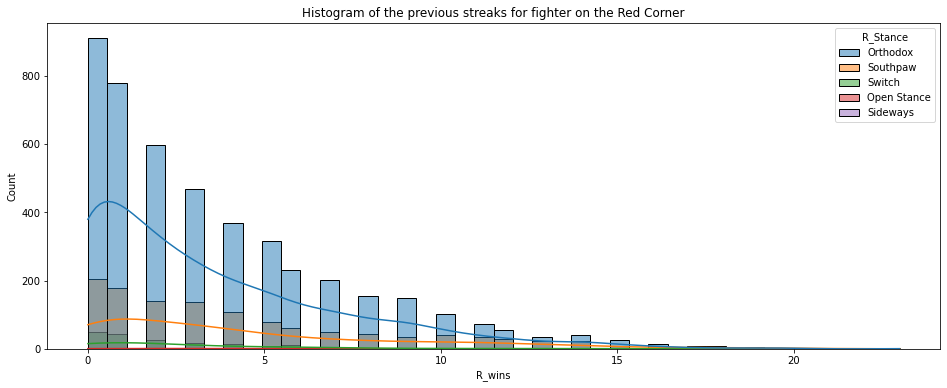

In [22]:
# Histograma de la distribució de la posició del lluitador 'Red' respecte les victories

plt.figure(figsize=(16, 6))
sns.histplot(data=ufc_df_sel[ufc_df_sel.R_Stance.str.match('Orthodox|Southpah|Switch').notna()], x='R_wins', hue='R_Stance', kde=True)

plt.title('Histogram of the previous streaks for fighter on the Red Corner');

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


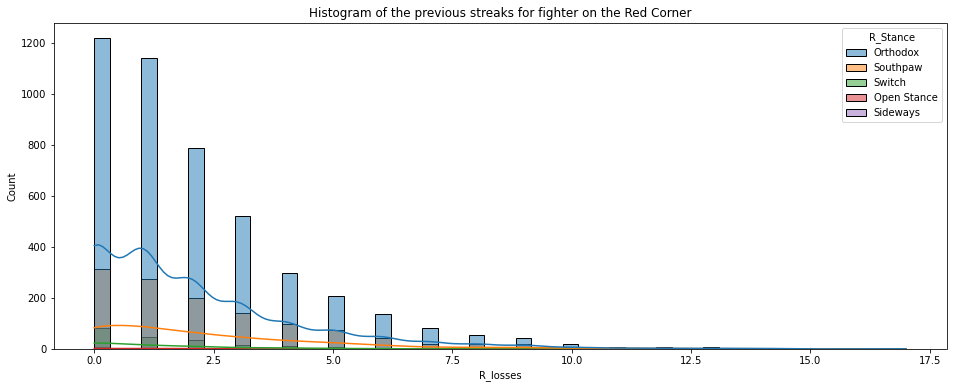

In [23]:
# El mateix per les derrotes

plt.figure(figsize=(16, 6))
sns.histplot(data=ufc_df_sel[ufc_df_sel.R_Stance.str.match('Orthodox|Southpah|Switch').notna()], x='R_losses', hue='R_Stance', kde=True)

plt.title('Histogram of the previous streaks for fighter on the Red Corner');

Descartem els combats en els quals s'enfronten Orthodox vs Orthodox i Southpaw vs southpaw perque les posibles aventatges s'anulen entre elles.

In [24]:
stance_mask = ((ufc_df_sel.R_Stance == 'Orthodox') & (ufc_df_sel.B_Stance == 'Orthodox')) | ((ufc_df_sel.R_Stance == 'Southpaw') & (ufc_df_sel.B_Stance == 'Southpaw'))

ufc_df_stance = ufc_df_sel[~stance_mask].dropna()
print (ufc_df_stance.B_Stance,ufc_df_stance.R_Stance)

5         Switch
7       Orthodox
10      Orthodox
12      Orthodox
14      Orthodox
          ...   
5723    Orthodox
5726    Southpaw
5727    Orthodox
5739    Orthodox
5884    Southpaw
Name: B_Stance, Length: 1496, dtype: object 5       Orthodox
7       Southpaw
10      Southpaw
12      Southpaw
14      Southpaw
          ...   
5723    Southpaw
5726    Orthodox
5727    Southpaw
5739    Southpaw
5884    Orthodox
Name: R_Stance, Length: 1496, dtype: object


In [25]:
# Utilitzem el test ANOVA per 3 grups per el lluitador del Red Corner (R)

ALPHA = 0.05


R_Orthodox = ufc_df_stance.loc[ufc_df_sel.R_Stance=='Orthodox','R_wins'].dropna()
R_Southpaw = ufc_df_stance.loc[ufc_df_sel.R_Stance=='Southpaw','R_wins'].dropna()
R_Switch = ufc_df_stance.loc[ufc_df_sel.R_Stance=='Switch','R_wins'].dropna()

stat, p = f_oneway(R_Orthodox, R_Southpaw, R_Switch)

print(f'F-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

F-statistic = 6.618
p-value = 0.001
We can reject H0


In [26]:
# Utilitzem el test ANOVA per 3 grups per el lluitador del Blue Corner (B)

ALPHA = 0.05

B_Orthodox = ufc_df_stance.loc[ufc_df_sel.B_Stance=='Orthodox','B_wins'].dropna()
B_Southpaw = ufc_df_stance.loc[ufc_df_sel.B_Stance=='Southpaw','B_wins'].dropna()
B_Switch = ufc_df_stance.loc[ufc_df_sel.B_Stance=='Switch','B_wins'].dropna()

stat, p = f_oneway(B_Orthodox, B_Southpaw, B_Switch)

print(f'F-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

F-statistic = 8.408
p-value = 0.000
We can reject H0


#### Resultat TEST

El p-value es menor que alpha=0.05, per tant **rebutjem la hipòtesi nul·la H0**, és a dir, rebutjem que la estaça del lluitador tingui influencia en el resultat final del combat.